In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# параметры распределений
mu0, sigma0 = -2., 1.
mu1, sigma1 = 3., 2.

In [41]:
def sample(d0, d1, n=32):
    x0 = d0.sample((int(n/2),2))
    x1 = d1.sample((int(n/2),2))
    y0 = torch.zeros((n, 1))
    y1 = torch.ones((n, 1))
    return torch.cat([x0, x1], 0), torch.cat([y0, y1], 0)

d0 = torch.distributions.Normal(torch.tensor([mu0]), torch.tensor([sigma0]))
d1 = torch.distributions.Normal(torch.tensor([mu1]), torch.tensor([sigma1]))

layer = nn.Linear(1, 1)
print([p.data[0] for p in layer.parameters()])
layer_opt = optim.SGD(lr=1e-3, params=list(layer.parameters()))

log_freq = 500
for i in range(10000):
    if i%log_freq == 0:
        with torch.no_grad():
            x, y = sample(d0, d1, 100000)
            out = torch.sigmoid(layer(x))
            loss = F.binary_cross_entropy(out, y)
        print('Ошибка после %d итераций: %f' %(i/log_freq, loss))
    layer_opt.zero_grad()
    x, y = sample(d0, d1, 1024)
    out = torch.sigmoid(layer(x))
    loss = F.binary_cross_entropy(out, y)
    loss.backward()
    layer_opt.step()

[tensor([0.3943]), tensor(0.7986)]


C:\Users\stepanovaev9\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Using a target size (torch.Size([200000, 1])) that is different to the input size (torch.Size([100000, 2, 1])) is deprecated. Please ensure they have the same size.


Ошибка после 0 итераций: 0.440330


C:\Users\stepanovaev9\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:26: UserWarning: Using a target size (torch.Size([2048, 1])) that is different to the input size (torch.Size([1024, 2, 1])) is deprecated. Please ensure they have the same size.


Ошибка после 1 итераций: 0.319013
Ошибка после 2 итераций: 0.261132
Ошибка после 3 итераций: 0.228171
Ошибка после 4 итераций: 0.206228
Ошибка после 5 итераций: 0.191501
Ошибка после 6 итераций: 0.179727
Ошибка после 7 итераций: 0.173909
Ошибка после 8 итераций: 0.165831
Ошибка после 9 итераций: 0.161164
Ошибка после 10 итераций: 0.157023
Ошибка после 11 итераций: 0.155081
Ошибка после 12 итераций: 0.151480
Ошибка после 13 итераций: 0.148125
Ошибка после 14 итераций: 0.146269
Ошибка после 15 итераций: 0.143977
Ошибка после 16 итераций: 0.142952
Ошибка после 17 итераций: 0.141868
Ошибка после 18 итераций: 0.140034
Ошибка после 19 итераций: 0.138715


In [47]:
x[:5]

tensor([[[ 0.8150],
         [-0.7569]],

        [[-1.6579],
         [-2.5524]],

        [[-1.7850],
         [-1.9353]],

        [[-1.5497],
         [-0.6135]],

        [[-1.0549],
         [-1.9751]]])

In [48]:
y[:5]

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.]])

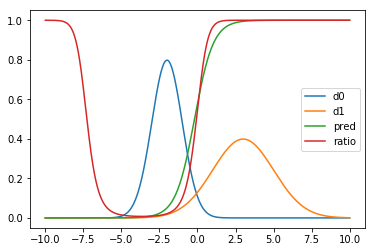

In [42]:
x_scale = np.linspace(-10, 10, 5000)
d0_pdf = stats.norm.pdf(x_scale, mu0, sigma0) 
d1_pdf = stats.norm.pdf(x_scale, mu1, sigma1)
x_tensor = torch.tensor(x_scale.reshape(-1, 1), dtype=torch.float)
with torch.no_grad():
    dist = torch.sigmoid(layer(x_tensor)).numpy()
ratio = d1_pdf / (d1_pdf + d0_pdf)

plt.plot(x_scale, d0_pdf*2, label='d0') # умножение на 2 для красоты графиков, на распределения не влияет
plt.plot(x_scale, d1_pdf*2, label='d1')
plt.plot(x_scale, dist.flatten(), label='pred')
plt.plot(x_scale, ratio, label='ratio')
plt.legend();